### Image Orientation

**Learning outcomes:**
- Load .nii.gz/.nii images using AntsPy and SITK using different orientations

In [1]:
%matplotlib inline

import os
from helpers import *

import ants
# noinspection PyPep8Naming
import SimpleITK as sitk

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.5.4
SimpleITK version = 2.4.1


In [2]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
print(f'project folder = {BASE_DIR}')

project folder = /home/younes/PycharmProjects/MRI-preprocessing-techniques


In [3]:
raw_examples = [
    'fsl-open-dev_sub-001_T1w.nii.gz',
    'wash-120_sub-001_T1w.nii.gz',
    'kf-panda_sub-01_ses-3T_T1w.nii.gz',
    'listen-task_sub-UTS01_ses-1_T1w.nii.gz'
]

### AntsPy

In [4]:
raw_img_path = os.path.join(BASE_DIR, 'assets', 'raw_examples', raw_examples[0])

In [5]:
raw_img_ants = ants.image_read(raw_img_path) 
print(raw_img_ants)

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (160, 192, 192)
	 Spacing    : (1.2, 1.25, 1.25)
	 Origin     : (98.1114, 89.5975, -129.5975)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]



In [6]:
# LPI = Left-to-right, Posterior-to-anterior, Inferior-to-superior
print(raw_img_ants.get_orientation())

LPI


In [7]:
arr = raw_img_ants.numpy()
print(raw_img_ants.get_orientation())
print(arr.shape, '-> (Z,Y,X)')

LPI
(160, 192, 192) -> (Z,Y,X)


LPI
(160, 192, 192) -> (Z,Y,X)


interactive(children=(IntSlider(value=79, description='SLICE', max=159), Output()), _dom_classes=('widget-inte…

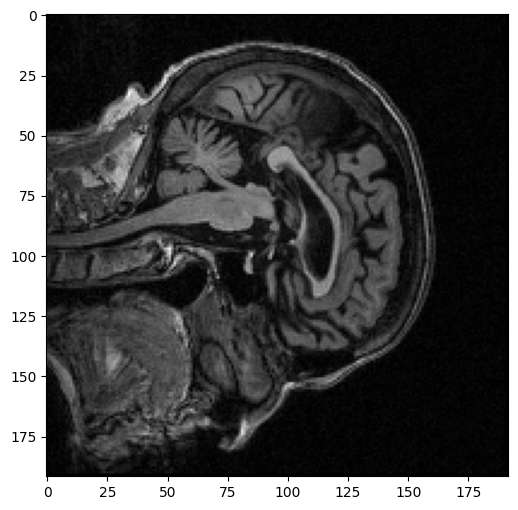

In [8]:
# LPI = Left-to-right, Posterior-to-anterior, Inferior-to-superior
arr = raw_img_ants.numpy()
print(raw_img_ants.get_orientation())
print(arr.shape, '-> (Z,Y,X)')
explore_3D_array(arr=raw_img_ants.numpy()) 

In [9]:
# Pixel arrangement
# Z, Y, X = (↑,↓,→)

IAL
(160, 192, 192) -> (Z,Y,X)


interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

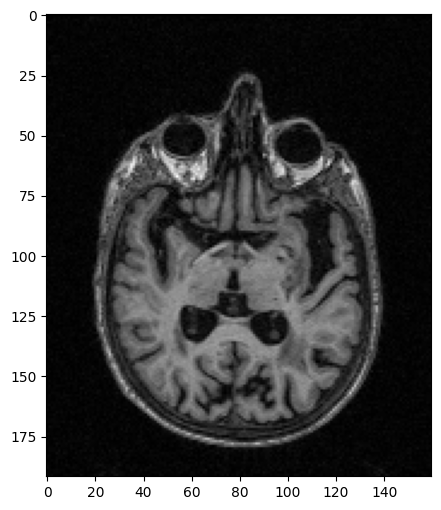

In [10]:
# LPI = Left-to-right, Posterior-to-anterior, Inferior-to-superior
# IAL = Inferior-to-superior, Anterior-to-posterior, Left-to-right
raw_img_ants = ants.image_read(raw_img_path, reorient='IAL') 

print(raw_img_ants.get_orientation())
print(arr.shape, '-> (Z,Y,X)')
explore_3D_array(arr=raw_img_ants.numpy()) 

### Simple ITK

In [11]:
raw_img_path = os.path.join(BASE_DIR, 'assets', 'raw_examples', raw_examples[0])
raw_img_sitk = sitk.ReadImage(raw_img_path, sitk.sitkFloat32)

(192, 192, 160)


interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

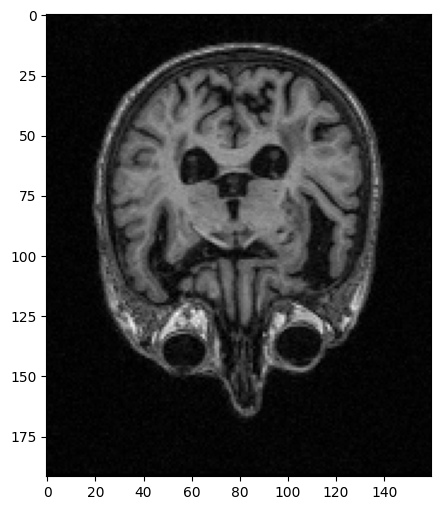

In [12]:
raw_img_sitk_arr = sitk.GetArrayFromImage(raw_img_sitk)
print(raw_img_sitk_arr.shape)
explore_3D_array(raw_img_sitk_arr)

For AntsPy:
- Internal axis are (Z,Y,X). It means, when we get numpy array dimensions are (Z,Y,X)
- When we define orientation, orientation string is according to internal axis.

For SimpleITK:
- Internal axis are (X,Y,Z). It means, when we get numpy array dimensions are (Z,Y,X) i.e. shifted.
- When we define orientation, orientation string is according to internal axis. 
- The orientation string is set with the latest letter, e.g. : 
    - "RPS" = (left-to-Right, anterior-to-Posterior, inferior-to-Superior)
    - "PSR" = (anterior-to-Posterior, inferior-to-Superior, left-to-Right)

(192, 192, 160)


interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

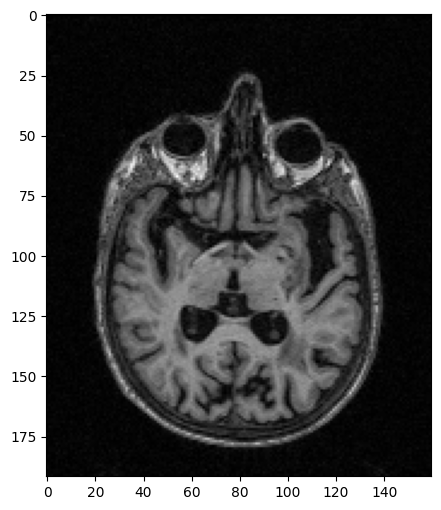

In [13]:
raw_img_sitk = sitk.ReadImage(raw_img_path, sitk.sitkFloat32)
raw_img_sitk = sitk.DICOMOrient(raw_img_sitk,'RPS')

raw_img_sitk_arr = sitk.GetArrayFromImage(raw_img_sitk)
print(raw_img_sitk_arr.shape)
explore_3D_array(raw_img_sitk_arr)

In [14]:
# Internal Pixel arrangement for SimpleItk
# (X, Y, Z) = (→, ↓, ↑)